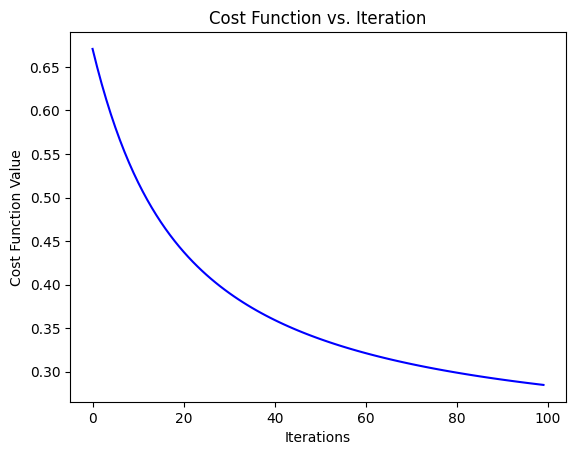

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

independent_data = "independent_variable.csv"
dependent_data = "dependent_variable.csv"

independent_df = pd.read_csv(independent_data, header=None)
dependent_df = pd.read_csv(dependent_data, header=None)

independent_df = (independent_df - independent_df.mean()) / independent_df.std()

intercept = np.ones((independent_df.shape[0], 1))
independent_df = np.concatenate((intercept, independent_df), axis=1)

X = independent_df
y = dependent_df.values.flatten()

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5 
    cost = (1 / m) * np.sum(-y * np.log(h + epsilon) - (1 - y) * np.log(1 - h + epsilon))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)
    return theta, costs

theta_initial = np.zeros(X.shape[1])

learning_rate = 0.1
iterations = 100

theta_trained, costs = gradient_descent(X, y, theta_initial, learning_rate, iterations)

plt.plot(range(iterations), costs, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs. Iteration')
plt.show()


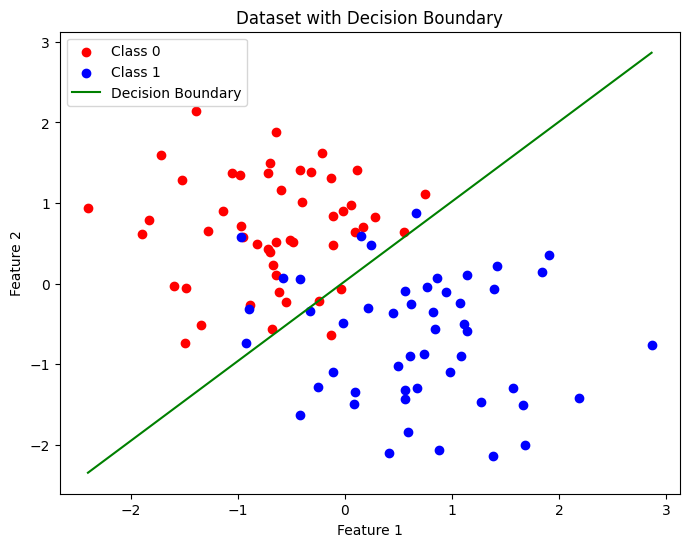

In [7]:

plt.figure(figsize=(8, 6))

plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], color='blue', label='Class 1')

x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta_trained[0] + theta_trained[1] * x_boundary) / theta_trained[2]
plt.plot(x_boundary, y_boundary, color='green', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset with Decision Boundary')
plt.legend()
plt.show()


In [8]:

predicted_labels = (sigmoid(np.dot(X, theta_trained)) >= 0.5).astype(int)

confusion_matrix = np.zeros((2, 2))
for i in range(len(y)):
    confusion_matrix[y[i], predicted_labels[i]] += 1

true_positive = confusion_matrix[1, 1]
false_positive = confusion_matrix[0, 1]
false_negative = confusion_matrix[1, 0]

accuracy = (true_positive + confusion_matrix[0, 0]) / np.sum(confusion_matrix)
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
f1_score = 2 * precision * recall / (precision + recall)

print("Confusion Matrix:")
print(confusion_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Confusion Matrix:
[[47.  3.]
 [ 8. 42.]]
Accuracy: 0.89
Precision: 0.9333333333333333
Recall: 0.84
F1 Score: 0.8842105263157894


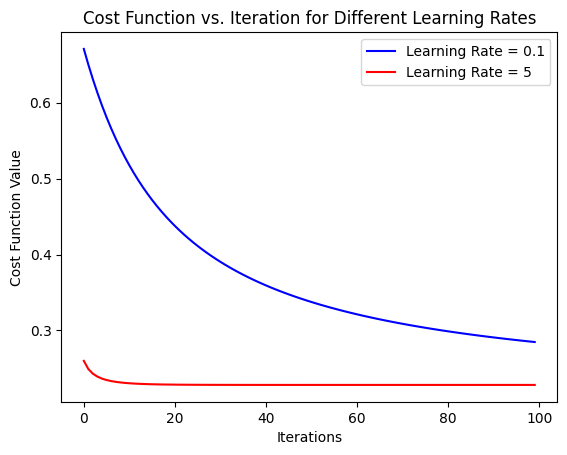

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

independent_data = "independent_variable.csv"
dependent_data = "dependent_variable.csv"

independent_df = pd.read_csv(independent_data, header=None)
dependent_df = pd.read_csv(dependent_data, header=None)

independent_df = (independent_df - independent_df.mean()) / independent_df.std()

intercept = np.ones((independent_df.shape[0], 1))
independent_df = np.concatenate((intercept, independent_df), axis=1)

X = independent_df
y = dependent_df.values.flatten()

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5 
    cost = (1 / m) * np.sum(-y * np.log(h + epsilon) - (1 - y) * np.log(1 - h + epsilon))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)
    return theta, costs

theta_initial = np.zeros(X.shape[1])

learning_rate_1 = 0.1
learning_rate_2 = 5
iterations = 100

theta_trained_1, costs_1 = gradient_descent(X, y, theta_initial, learning_rate_1, iterations)

theta_trained_2, costs_2 = gradient_descent(X, y, theta_initial, learning_rate_2, iterations)

plt.plot(range(iterations), costs_1, color='blue', label='Learning Rate = 0.1')
plt.plot(range(iterations), costs_2, color='red', label='Learning Rate = 5')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs. Iteration for Different Learning Rates')
plt.legend()
plt.show()


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
independent_data = "independent_variable.csv"
dependent_data = "dependent_variable.csv"

# Load independent data
independent_df = pd.read_csv(independent_data, header=None)
# Load dependent data
dependent_df = pd.read_csv(dependent_data, header=None)

# Normalize independent variables
independent_df = (independent_df - independent_df.mean()) / independent_df.std()

# Add intercept term
intercept = np.ones((independent_df.shape[0], 1))
independent_df = np.concatenate((intercept, independent_df), axis=1)

# Convert data to numpy arrays
X = independent_df
y = dependent_df.values.flatten()

# Define logistic sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define cost function
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5  # to prevent log(0) case
    cost = (1 / m) * np.sum(-y * np.log(h + epsilon) - (1 - y) * np.log(1 - h + epsilon))
    return cost

# Define gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)
    return theta, costs

# Initialize theta
theta_initial = np.zeros(X.shape[1])

# Set hyperparameters
learning_rate = 0.1
iterations = 1000  # Increase iterations for better convergence

# Train the model
theta_trained, costs = gradient_descent(X, y, theta_initial, learning_rate, iterations)

# Obtain the cost function value and learned parameter values after convergence
final_cost = compute_cost(X, y, theta_trained)

print("Cost function value after convergence:", final_cost)
print("Learned parameter values after convergence:", theta_trained)


Cost function value after convergence: 0.22911422283498403
Learned parameter values after convergence: [ 0.32297575  2.39501804 -2.50354765]


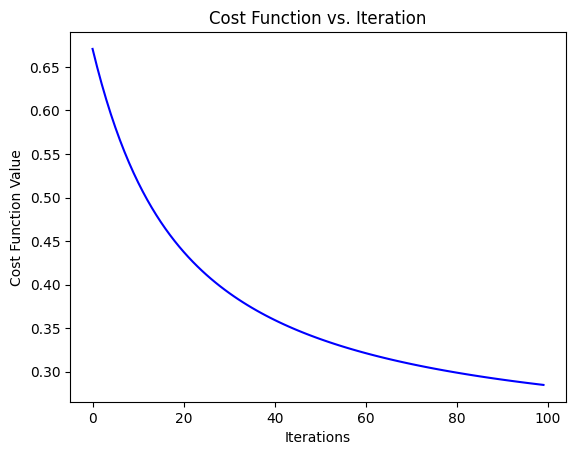

In [11]:
independent_data = "independent_variable.csv"
dependent_data = "dependent_variable.csv"

independent_df = pd.read_csv(independent_data, header=None)
dependent_df = pd.read_csv(dependent_data, header=None)

independent_df = (independent_df - independent_df.mean()) / independent_df.std()

intercept = np.ones((independent_df.shape[0], 1))
independent_df = np.concatenate((intercept, independent_df), axis=1)

X = independent_df
y = dependent_df.values.flatten()

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5 
    cost = (1 / m) * np.sum(-y * np.log(h + epsilon) - (1 - y) * np.log(1 - h + epsilon))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []
    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)
    return theta, costs

theta_initial = np.zeros(X.shape[1])

learning_rate = 0.1
iterations = 100

theta_trained, costs = gradient_descent(X, y, theta_initial, learning_rate, iterations)

plt.plot(range(iterations), costs, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs. Iteration')
plt.show()
